In [1]:
from Model.DCVAE import DCVAE,DCVAE_Norm,DCVAE_NormV2
from Model.Utils import LoadMPS100,PlotHistory,PlotDataAE
from keras.utils import to_categorical
from keras.optimizers import RMSprop,Adam
import numpy as np

/root/miniconda3/envs/tensorflow35/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import tensorflow as tf
import os
from keras.backend.tensorflow_backend import set_session
os.environ["CUDA_VISIBLE_DEVICES"]="1"
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
set_session(tf.Session(config=config))

In [3]:
x_train1,x_test1=LoadMPS100(dirBase='DataSet/MPS-100.mat',AllTrain=True);
x_train=to_categorical(x_train1,2)
x_test=to_categorical(x_test1,2)

In [4]:
model = DCVAE(input_shape=(100, 100, 2),filters=[32,32,32],strides=[2,2,2],hidden_dim=4000,
               KernelDim=(5,5,5),latent_dim=1000,opt=RMSprop(lr=0.001),dropout=0.0)

In [5]:
model.fit(x_train, num_epochs=1000,batch_size=128,val_split=0.2,verbose=0)

Setting up model...
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 100, 100, 2)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 50, 50, 32)   1632        input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 25, 25, 32)   25632       conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 13, 13, 32)   25632       conv2d_2[0][0]                   
_________________________________________________________________________________________


Epoch 00105: ReduceLROnPlateau reducing learning rate to 0.00016384001355618238.



Epoch 00113: ReduceLROnPlateau reducing learning rate to 8.192000677809119e-05.



Epoch 00119: ReduceLROnPlateau reducing learning rate to 4.0960003389045596e-05.



Epoch 00126: ReduceLROnPlateau reducing learning rate to 1.638400135561824e-05.



Epoch 00131: ReduceLROnPlateau reducing learning rate to 8.19200067780912e-06.



val_loss   :  [1673.748734375, 1672.692638671875, 1674.2984638671876, 1673.995798828125]
loss   :  [1345.0796098632813, 1344.52146484375, 1344.168166015625, 1343.73592578125]


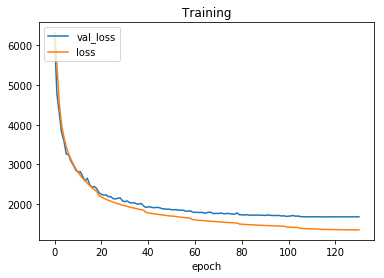

In [6]:
PlotHistory(model.history.history,listKeys=['val_loss','loss']) 

lr   :  [1.6384001e-05, 1.6384001e-05, 1.6384001e-05, 1.6384001e-05]


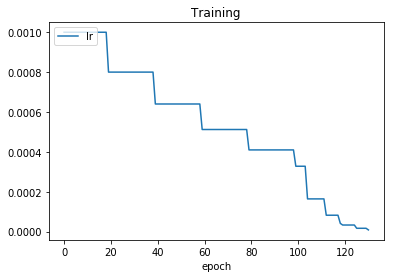

In [7]:
PlotHistory(model.history.history,listKeys=['lr'])

val_acc_pred   :  [0.941265163898468, 0.9412950744628906, 0.9412531270980835, 0.9412335863113404]
acc_pred   :  [0.9539751806259156, 0.9539939708709717, 0.9540189738273621, 0.9540285260677338]


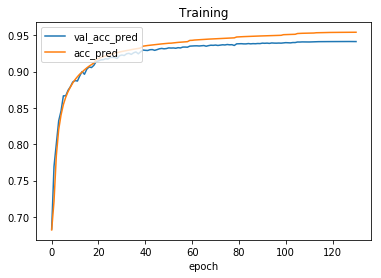

In [8]:
PlotHistory(model.history.history,listKeys=['val_acc_pred','acc_pred'])

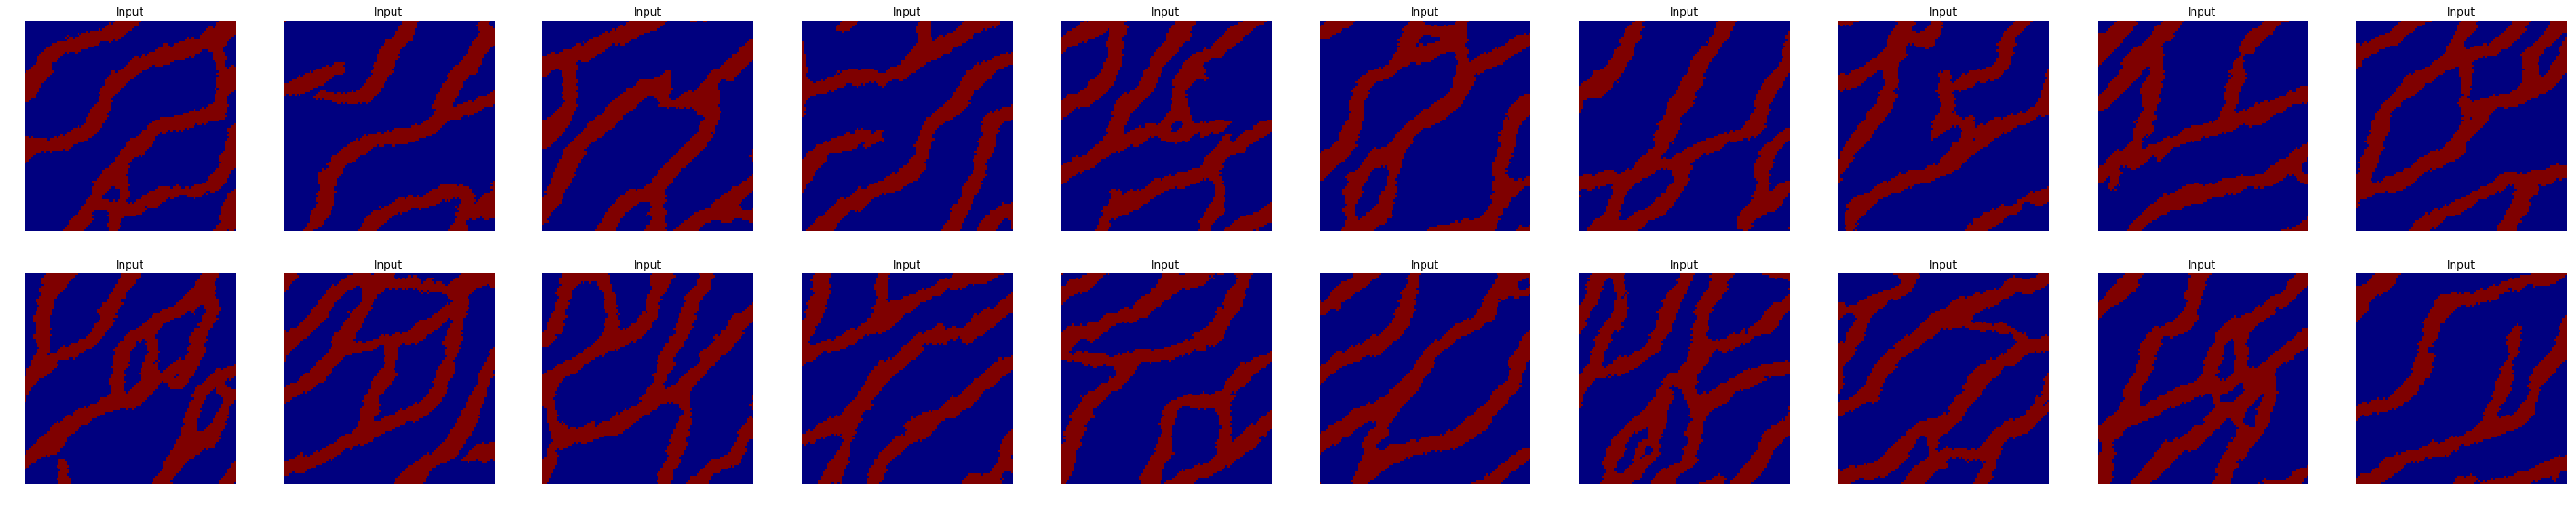

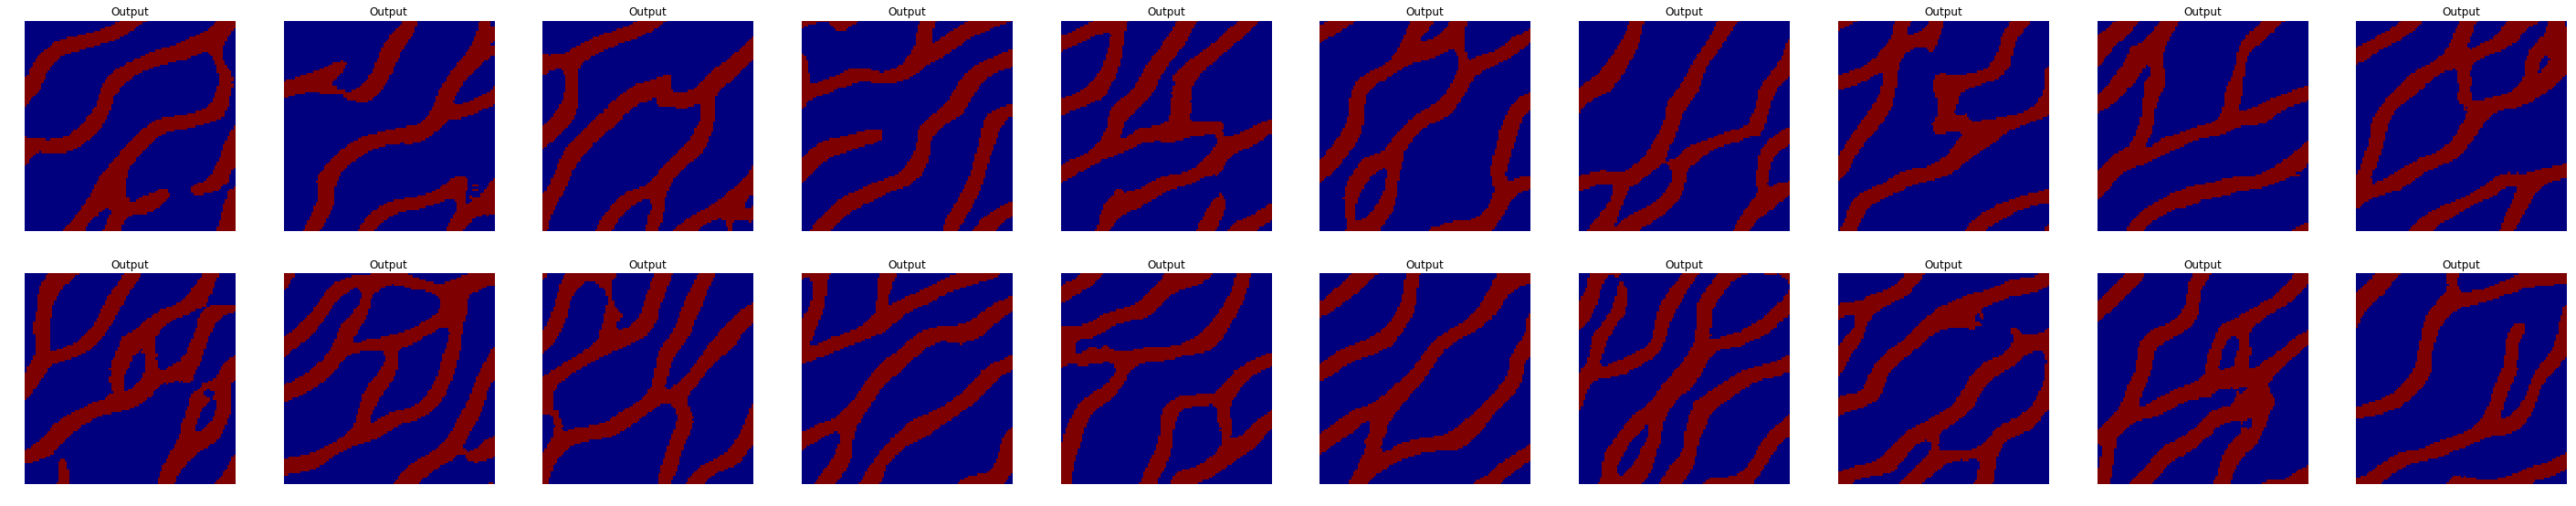

In [9]:
x_rec=model.model.predict(x_test)
PlotDataAE(x_test[:,:,:,1],np.argmax(x_rec[:,:,:,:],axis=-1),digit_size=100)

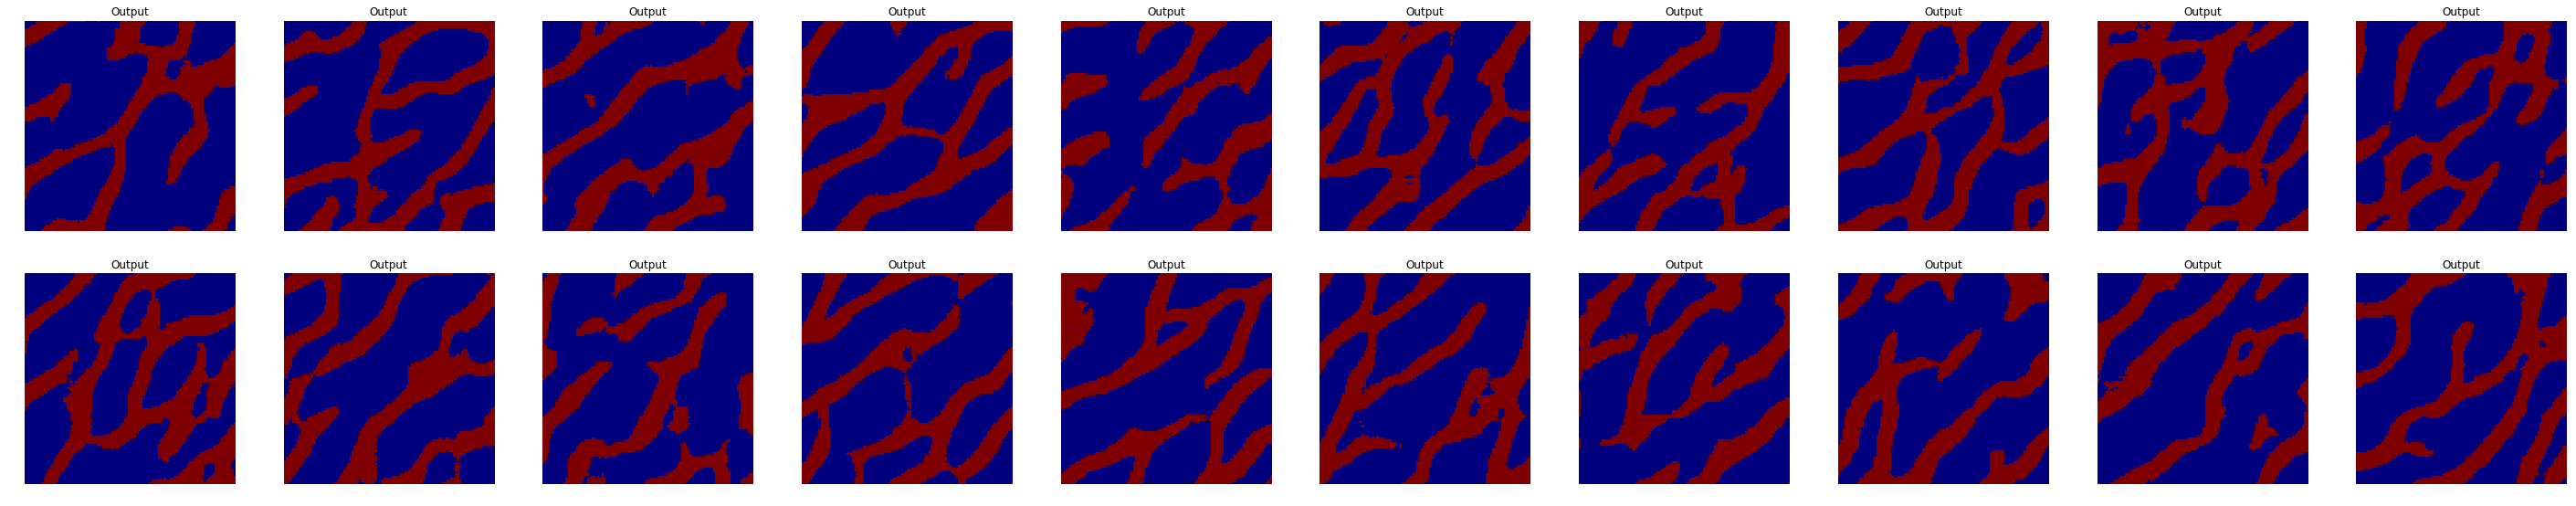

In [10]:
x_gen=model.generate(binary=True)
PlotDataAE([],x_gen[:,:,:],digit_size=100,Only_Result=False)